In [1]:
import numpy as np

In [2]:
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])

In [3]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [4]:
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [5]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

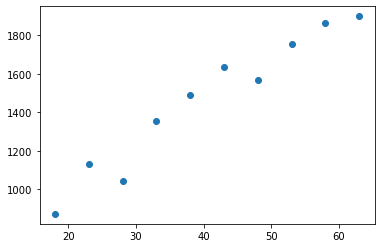

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [8]:
# b0
regressor.intercept_

array([541.24363636])

In [9]:
# b1
regressor.coef_

array([[22.72484848]])

In [10]:
previsao1 = regressor.intercept_ + regressor.coef_ * 40

In [11]:
previsao1

array([[1450.23757576]])

In [12]:
previsao2 = regressor.predict([[40]])
previsao2

array([[1450.23757576]])

In [13]:
previsoes = regressor.predict(X)
previsoes

array([[ 950.29090909],
       [1063.91515152],
       [1177.53939394],
       [1291.16363636],
       [1404.78787879],
       [1518.41212121],
       [1632.03636364],
       [1745.66060606],
       [1859.28484848],
       [1972.90909091]])

In [14]:
resultado = abs(y - previsoes).mean()
resultado

70.15515151515152

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mae = mean_absolute_error(y, previsoes)
mse = mean_squared_error(y, previsoes)

In [17]:
mae

70.15515151515152

In [18]:
mse

6412.675151515151

Text(0, 0.5, 'Custo')

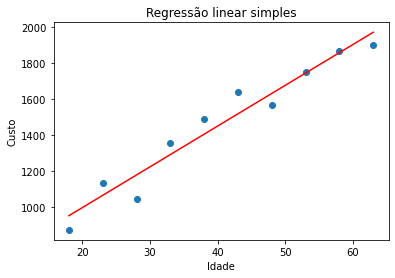

In [19]:
plt.plot(X, y, 'o')
plt.plot(X, previsoes, color = 'red')
plt.title('Regressão linear simples')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [20]:
# Get the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [21]:
# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y) 

KNeighborsClassifier(n_neighbors=1)

In [22]:
# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X)

In [23]:
print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


In [24]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

In [25]:
data = load_boston()
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)
expected = data.target

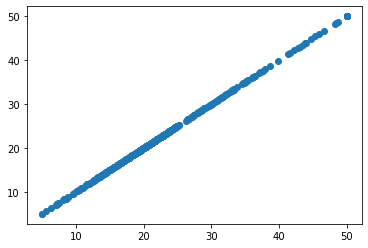

In [26]:
plt.scatter(expected, predicted)

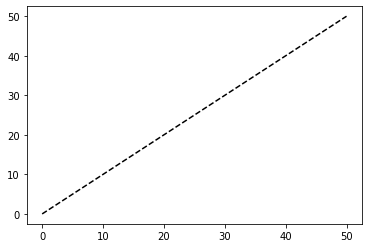

In [27]:
plt.plot([0, 50], [0, 50], '--k')

In [28]:
from sklearn import model_selection
X = digits.data
y = digits.target

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


In [31]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
print(metrics.confusion_matrix(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [34]:
metrics.f1_score(y_test, y_pred, average="macro")

0.9913675218842191

In [35]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [37]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

In [38]:
for Model in [GaussianNB, KNeighborsClassifier, LinearSVC]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))  

GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
LinearSVC: 0.9407259316208952


/home/juda/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
clf = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [40]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5)
cross_val_score(clf, X, y, cv=cv) 

array([0.98888889, 0.97777778, 0.99444444, 0.97777778, 0.98888889])

In [41]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


In [42]:
from sklearn.linear_model import Ridge, Lasso

In [43]:
for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

Ridge: 0.4101758336587286
Lasso: 0.3375597834274947


In [44]:
alphas = np.logspace(-3, -1, 30)

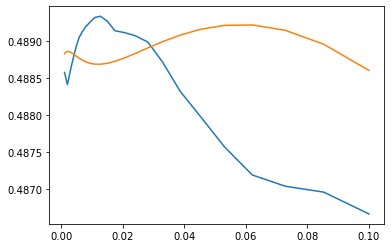

In [45]:
for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__) 

In [46]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

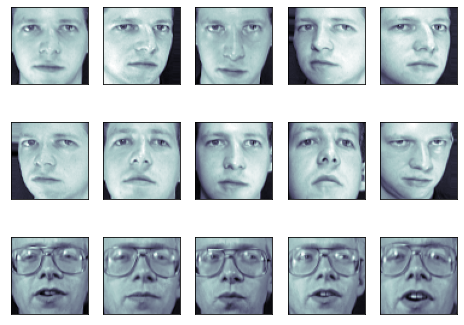

In [47]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [49]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

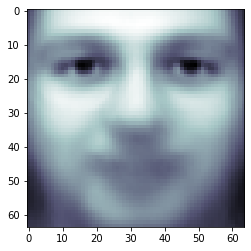

In [50]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

In [51]:
print(pca.components_.shape)

(150, 4096)


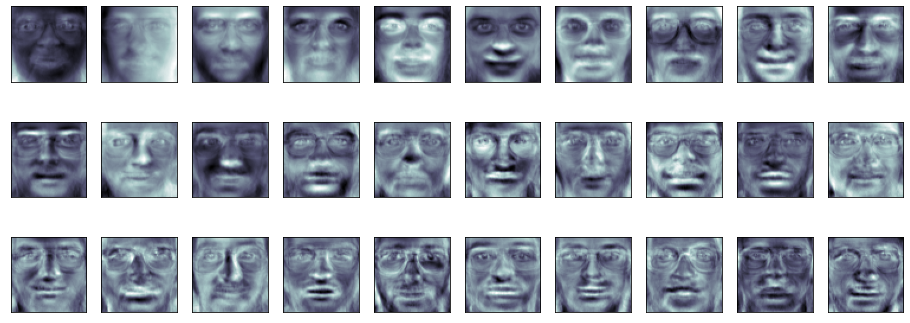

In [52]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [53]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [54]:
print(X_test_pca.shape)

(100, 150)


In [55]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

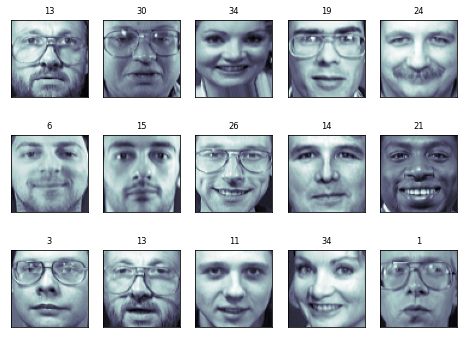

In [56]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [57]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [58]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
